In [427]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import seaborn as sns

In [428]:
df = pd.read_csv("ALL_DATA_COMBINED.csv")

In [429]:
df.columns

Index(['week_start', 'digital_catchuptv_bledina_brand-equity_spends',
       'digital_dataretailers_bledina_brand-equity_spends',
       'digital_directbuying_bledina_brand-equity_spends',
       'digital_keywordtargeting_bledina_brand-equity_spends',
       'digital_nativeads_bledina_brand-equity_spends',
       'digital_programmatic_bledina_brand-equity_spends',
       'digital_sea_bledina_brand-equity_spends',
       'digital_social_bledina_brand-equity_spends',
       'press_equity_bledina_brand-equity_spends',
       'tv_equity_bledina_brand-equity_spends',
       'digital_dataretailers_bledina_brand-range_spends',
       'digital_directbuying_bledina_brand-range_spends',
       'digital_keywordtargeting_bledina_brand-range_spends',
       'digital_programmatic_bledina_brand-range_spends',
       'digital_sea_bledina_brand-range_spends',
       'digital_social_bledina_brand-range_spends',
       'press_product_bledina_brand-range_spends',
       'app_total_bledina_brand_visits', '

In [430]:
X=df.drop(['week_start','Sales','retail_total_bledina_product_volume','retail_total_bledina_product_price'],axis=1)
y=df['Sales']

In [431]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [432]:
# Create a linear regression model to use for feature selection
lr = LinearRegression()
lr.fit(X_train,y_train)
#

LinearRegression()

rfe = RFE(lr,10)
rfe = rfe.fit(X_train,y_train)

In [433]:
rfe = RFE(estimator=lr,n_features_to_select=17, step=1)

rfe.fit(X_train,y_train)

# Get the list of selected features
selected_features = X.columns[rfe.support_]
selected_df = pd.DataFrame({'Selected Features': selected_features})

# Print the dataframe as a table
selected_df

,Selected Features
0,digital_nativeads_bledina_brand-equity_spends
1,digital_directbuying_bledina_brand-range_spends
2,digital_keywordtargeting_bledina_brand-range_s...
3,digital_sea_bledina_brand-range_spends
4,digital_social_bledina_brand-range_spends
5,competition_ooh_competition-nestle_total_spends
6,macroeconomic_total_total_total_cci
7,macroeconomic_total_total_total_holiday
8,macroeconomic_total_total_total_livebirths
9,macroeconomic_total_total_total_lockdownflag


In [434]:
selected_features

Index(['digital_nativeads_bledina_brand-equity_spends',
       'digital_directbuying_bledina_brand-range_spends',
       'digital_keywordtargeting_bledina_brand-range_spends',
       'digital_sea_bledina_brand-range_spends',
       'digital_social_bledina_brand-range_spends',
       'competition_ooh_competition-nestle_total_spends',
       'macroeconomic_total_total_total_cci',
       'macroeconomic_total_total_total_holiday',
       'macroeconomic_total_total_total_livebirths',
       'macroeconomic_total_total_total_lockdownflag',
       'macroeconomic_total_total_total_unemploymentrate',
       'macroeconomic_total_total_total_weeklycases',
       'macroeconomic_total_total_total_weeklydeath',
       'digital_keywordtargeting_bledina_product_spends',
       'retail_total_bledina_product_dvm',
       'competition_retail_competition_nonorganic_dvm',
       'competition_retail_competition_nonorganic_price'],
      dtype='object')

In [435]:
n

['digital_directbuying_bledina_brand-range_spends',
 'digital_keywordtargeting_bledina_brand-range_spends',
 'digital_sea_bledina_brand-range_spends',
 'digital_social_bledina_brand-range_spends',
 'competition_ooh_competition-nestle_total_spends',
 'macroeconomic_total_total_total_cci',
 'macroeconomic_total_total_total_holiday',
 'macroeconomic_total_total_total_livebirths',
 'macroeconomic_total_total_total_lockdownflag',
 'macroeconomic_total_total_total_unemploymentrate',
 'macroeconomic_total_total_total_weeklycases',
 'macroeconomic_total_total_total_weeklydeath',
 'retail_total_bledina_product_dvm',
 'competition_retail_competition_nonorganic_dvm',
 'competition_retail_competition_nonorganic_price']

In [436]:
df[n].corr()

,digital_directbuying_bledina_brand-range_spends,digital_keywordtargeting_bledina_brand-range_spends,digital_sea_bledina_brand-range_spends,digital_social_bledina_brand-range_spends,competition_ooh_competition-nestle_total_spends,macroeconomic_total_total_total_cci,macroeconomic_total_total_total_holiday,macroeconomic_total_total_total_livebirths,macroeconomic_total_total_total_lockdownflag,macroeconomic_total_total_total_unemploymentrate,macroeconomic_total_total_total_weeklycases,macroeconomic_total_total_total_weeklydeath,retail_total_bledina_product_dvm,competition_retail_competition_nonorganic_dvm,competition_retail_competition_nonorganic_price
digital_directbuying_bledina_brand-range_spends,1.000000,-0.028043,-0.060375,-0.025913,-0.024656,-0.092163,0.030930,0.019503,-0.033826,0.065727,-0.026159,-0.023995,-0.028362,-0.087927,-0.044211
digital_keywordtargeting_bledina_brand-range_spends,-0.028043,1.000000,0.364272,-0.052927,-0.050358,-0.072828,-0.026344,-0.148571,0.475394,-0.389968,0.248924,0.111456,-0.233721,0.445392,0.026342
digital_sea_bledina_brand-range_spends,-0.060375,0.364272,1.000000,0.050195,-0.108415,-0.237429,0.124486,-0.250493,0.826101,-0.629682,0.557394,0.627927,-0.595387,0.416638,0.061727
digital_social_bledina_brand-range_spends,-0.025913,-0.052927,0.050195,1.000000,-0.046533,0.216172,-0.069924,0.156724,-0.063840,-0.209243,-0.049370,-0.045285,-0.192968,0.062819,0.172079
competition_ooh_competition-nestle_total_spends,-0.024656,-0.050358,-0.108415,-0.046533,1.000000,-0.119631,-0.016625,0.164382,-0.060741,0.130630,-0.046974,-0.043087,0.078951,-0.030214,-0.003141
macroeconomic_total_total_total_cci,-0.092163,-0.072828,-0.237429,0.216172,-0.119631,1.000000,-0.043004,0.058003,-0.320222,0.133729,-0.127842,-0.177775,0.241284,0.109078,0.361676
macroeconomic_total_total_total_holiday,0.030930,-0.026344,0.124486,-0.069924,-0.016625,-0.043004,1.000000,0.099323,0.102027,-0.051740,0.010947,0.066310,0.003666,0.024495,0.054258
macroeconomic_total_total_total_livebirths,0.019503,-0.148571,-0.250493,0.156724,0.164382,0.058003,0.099323,1.000000,-0.176564,0.193373,-0.249714,-0.256524,0.105261,-0.163829,0.235453
macroeconomic_total_total_total_lockdownflag,-0.033826,0.475394,0.826101,-0.063840,-0.060741,-0.320222,0.102027,-0.176564,1.000000,-0.470379,0.696641,0.694810,-0.416667,0.419308,-0.041730
macroeconomic_total_total_total_unemploymentrate,0.065727,-0.389968,-0.629682,-0.209243,0.130630,0.133729,-0.051740,0.193373,-0.470379,1.000000,-0.363763,-0.333664,0.825450,-0.449234,-0.302239


<AxesSubplot:>

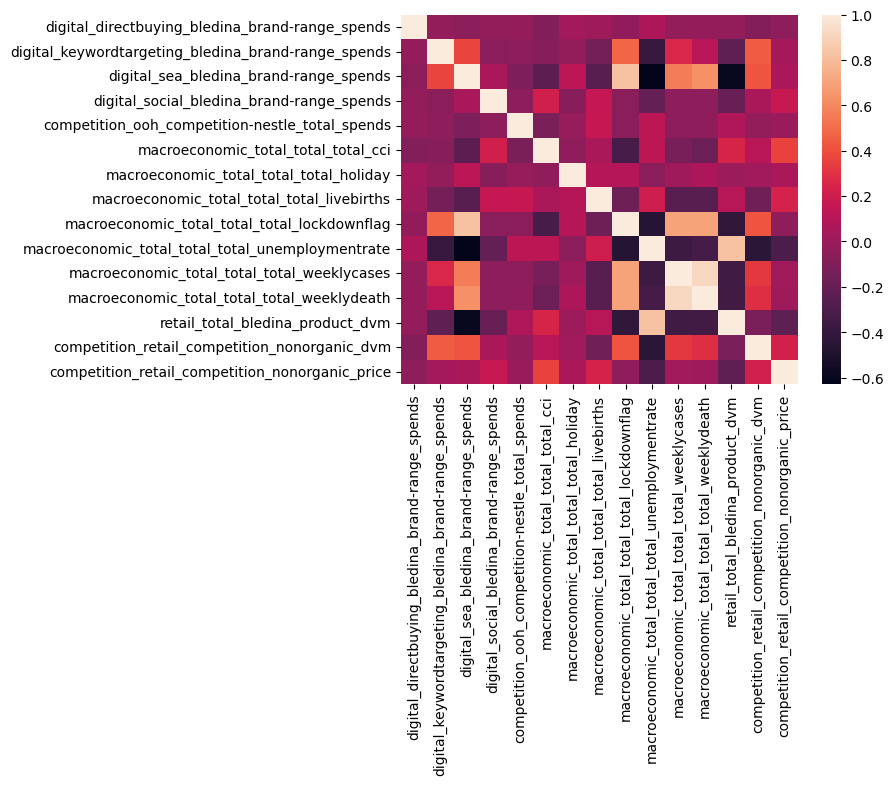

In [437]:
sns.heatmap(df[n].corr())

In [438]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('digital_catchuptv_bledina_brand-equity_spends', False, 16),
 ('digital_dataretailers_bledina_brand-equity_spends', False, 14),
 ('digital_directbuying_bledina_brand-equity_spends', False, 21),
 ('digital_keywordtargeting_bledina_brand-equity_spends', False, 4),
 ('digital_nativeads_bledina_brand-equity_spends', True, 1),
 ('digital_programmatic_bledina_brand-equity_spends', False, 31),
 ('digital_sea_bledina_brand-equity_spends', False, 18),
 ('digital_social_bledina_brand-equity_spends', False, 29),
 ('press_equity_bledina_brand-equity_spends', False, 5),
 ('tv_equity_bledina_brand-equity_spends', False, 22),
 ('digital_dataretailers_bledina_brand-range_spends', False, 8),
 ('digital_directbuying_bledina_brand-range_spends', True, 1),
 ('digital_keywordtargeting_bledina_brand-range_spends', True, 1),
 ('digital_programmatic_bledina_brand-range_spends', False, 2),
 ('digital_sea_bledina_brand-range_spends', True, 1),
 ('digital_social_bledina_brand-range_spends', True, 1),
 ('press_

In [439]:
n = selected_features.tolist()

In [440]:
#n.remove('retail_total_bledina_product_price')

In [441]:
#n.remove('retail_total_bledina_product_dvm')

In [442]:
#n.remove('competition_retail_competition_nonorganic_dvm')

In [443]:
#n.remove('competition_retail_competition_nonorganic_price')

In [444]:
# n.remove('macroeconomic_total_total_total_cci')

In [445]:
#n.remove('macroeconomic_total_total_total_unemploymentrate')

In [446]:
n

['digital_nativeads_bledina_brand-equity_spends',
 'digital_directbuying_bledina_brand-range_spends',
 'digital_keywordtargeting_bledina_brand-range_spends',
 'digital_sea_bledina_brand-range_spends',
 'digital_social_bledina_brand-range_spends',
 'competition_ooh_competition-nestle_total_spends',
 'macroeconomic_total_total_total_cci',
 'macroeconomic_total_total_total_holiday',
 'macroeconomic_total_total_total_livebirths',
 'macroeconomic_total_total_total_lockdownflag',
 'macroeconomic_total_total_total_unemploymentrate',
 'macroeconomic_total_total_total_weeklycases',
 'macroeconomic_total_total_total_weeklydeath',
 'digital_keywordtargeting_bledina_product_spends',
 'retail_total_bledina_product_dvm',
 'competition_retail_competition_nonorganic_dvm',
 'competition_retail_competition_nonorganic_price']

In [447]:
X_train = X_train[selected_features]

In [448]:
X_train['constant']=1

In [449]:
X_train

,digital_nativeads_bledina_brand-equity_spends,digital_directbuying_bledina_brand-range_spends,digital_keywordtargeting_bledina_brand-range_spends,digital_sea_bledina_brand-range_spends,digital_social_bledina_brand-range_spends,competition_ooh_competition-nestle_total_spends,macroeconomic_total_total_total_cci,macroeconomic_total_total_total_holiday,macroeconomic_total_total_total_livebirths,macroeconomic_total_total_total_lockdownflag,macroeconomic_total_total_total_unemploymentrate,macroeconomic_total_total_total_weeklycases,macroeconomic_total_total_total_weeklydeath,digital_keywordtargeting_bledina_product_spends,retail_total_bledina_product_dvm,competition_retail_competition_nonorganic_dvm,competition_retail_competition_nonorganic_price,constant
162,0.00,0.0,0.000000,625.20,0.0,0.0,105.0,0,53500.0,0,7.6,1,1,0.000,55.640099,50.715775,4.827990,1
153,0.00,0.0,0.000000,374.98,0.0,0.0,102.0,0,59800.0,0,7.8,0,0,0.000,57.506198,52.205828,4.909098,1
109,0.00,0.0,0.000000,227.99,0.0,0.0,95.0,0,51900.0,0,8.4,0,0,1597.388,59.044464,49.718437,4.816137,1
148,0.00,0.0,0.000000,560.28,0.0,0.0,105.0,0,58700.0,0,7.8,0,0,0.000,57.958082,52.913031,4.917344,1
26,0.00,0.0,0.000000,0.00,0.0,0.0,104.0,0,65170.0,0,9.2,0,0,0.000,62.924533,50.372111,4.834991,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.00,0.0,0.000000,0.00,0.0,0.0,92.0,0,59900.0,0,8.4,0,0,1617.550,56.383105,51.657757,4.755313,1
14,2846.18,0.0,0.000000,0.00,0.0,0.0,100.0,0,57195.0,0,9.2,0,0,0.000,65.411332,50.178169,4.839290,1
92,0.00,0.0,0.000000,0.00,0.0,0.0,94.0,0,63588.0,0,8.4,0,0,0.000,57.676341,48.589657,4.800455,1
179,0.00,0.0,4148.221368,2688.40,0.0,0.0,93.0,0,59436.0,1,7.6,2438,251,0.000,56.617011,54.727325,4.789930,1


In [450]:
y_train = pd.DataFrame(y_train)

In [451]:
y_train

,Sales
162,4677875.0
153,4913048.0
109,5263122.5
148,5511442.5
26,6100135.0
...,...
106,5316150.0
14,5428030.0
92,5004340.0
179,5183900.0


In [452]:
model = sm.OLS(y_train, X_train).fit()

In [453]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     6.366
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           3.89e-10
Time:                        13:41:06   Log-Likelihood:                -1801.3
No. Observations:                 127   AIC:                             3639.
Df Residuals:                     109   BIC:                             3690.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [454]:
model2 = sm.OLS(y_test, X_test).fit()

In [455]:
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              508.7
Date:                Thu, 20 Apr 2023   Prob (F-statistic):                    1.51e-11
Time:                        13:41:06   Log-Likelihood:                         -713.32
No. Observations:                  55   AIC:                                      1519.
Df Residuals:                       9   BIC:                                      1611.
Df Model:                          46                                                  
Covariance Type:            nonrobust                                                  
                                                           coef    std err          t      P>|t|      [0.025      0.975]